In [1]:
import random
from collections import defaultdict
import matplotlib.pyplot as plt
def simulate_game_choices():
    strings = {1: [1, 2, 1], 2: [3, 4, 1], 3: [5, 6, 1], 4: [7, 8, 1], 5: [9, 10, 1], 6: [11, 12, 1]}
    loop_lengths = []
    for _ in range(6):
        ends = [end for string in strings.values() for end in string[:2]]
        if len(ends) <= 0:
            break
        end1, end2 = random.sample(ends, 2)
        strings_with_ends = {key: value for key, value in strings.items() if end1 in value[:2] or end2 in value[:2]}
        if len(strings_with_ends) == 1:
            string_id, string_data = next(iter(strings_with_ends.items()))
            loop_lengths.append(string_data[2])
            del strings[string_id]
            continue
        string_ids = list(strings_with_ends.keys())
        combined_length = sum(strings_with_ends[id][2] for id in string_ids)
        new_ends = [end for id in string_ids for end in strings_with_ends[id][:2] if end not in [end1, end2]]
        new_string_id = max(strings.keys(), default=0) + 1      
        for id in string_ids:
            del strings[id]
        strings[new_string_id] = new_ends + [combined_length]
    return tuple(sorted(loop_lengths))

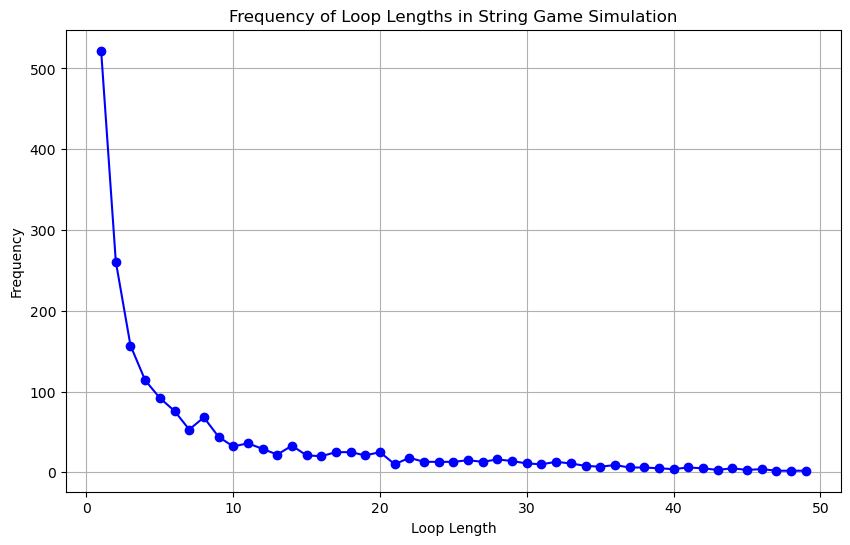

In [3]:
# Modifying the provided code to simulate the game with 50 strings instead of 6

import random
from collections import defaultdict

def simulate_game_choices(num_strings=50):
    # Initialize strings: create 50 strings with unique ends and a length of 1
    strings = {i: [2*i-1, 2*i, 1] for i in range(1, num_strings+1)}
    loop_lengths = []
    
    # We need a maximum of num_strings - 1 picks to end the game if no loops are formed
    for _ in range(num_strings - 1):
        ends = [end for string in strings.values() for end in string[:2]]
        if len(ends) <= 0:
            break
        end1, end2 = random.sample(ends, 2)
        strings_with_ends = {key: value for key, value in strings.items() if end1 in value[:2] or end2 in value[:2]}
        
        if len(strings_with_ends) == 1:
            string_id, string_data = next(iter(strings_with_ends.items()))
            loop_lengths.append(string_data[2])
            del strings[string_id]
            continue
        
        string_ids = list(strings_with_ends.keys())
        combined_length = sum(strings_with_ends[id][2] for id in string_ids)
        new_ends = [end for id in string_ids for end in strings_with_ends[id][:2] if end not in [end1, end2]]
        new_string_id = max(strings.keys(), default=0) + 1
        for id in string_ids:
            del strings[id]
        
        strings[new_string_id] = new_ends + [combined_length]
    
    return tuple(sorted(loop_lengths))

loop_frequencies = defaultdict(int)
for result in all_results:
    for loop_length in result:
        loop_frequencies[loop_length] += 1

loop_lengths = sorted(loop_frequencies.keys())
frequencies = [loop_frequencies[length] for length in loop_lengths]

plt.figure(figsize=(10, 6))
plt.plot(loop_lengths, frequencies, marker='o', linestyle='-', color='b')
plt.title('Frequency of Loop Lengths in String Game Simulation')
plt.xlabel('Loop Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()